In [2]:
import sys,os
import uproot4 as uproot
import awkward1 as ak
import json
import numpy as np
import matplotlib.pyplot as plt
from fcc_python_tools.locations import loc
from fcc_python_tools import kinematics
from particle import literals as lp
from fcc_python_tools import plotting

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)

In [21]:
file = uproot.open("/eos/experiment/fcc/ee/tmp/fcc_python_tools/FCCDelphesOutput_10k.root")
tree = file['events']

['genParticles',
 'genParticles/genParticles.core.pdgId',
 'genParticles/genParticles.core.charge',
 'genParticles/genParticles.core.status',
 'genParticles/genParticles.core.vertex.x',
 'genParticles/genParticles.core.vertex.y',
 'genParticles/genParticles.core.vertex.z',
 'genParticles/genParticles.core.p4.mass',
 'genParticles/genParticles.core.p4.px',
 'genParticles/genParticles.core.p4.py',
 'genParticles/genParticles.core.p4.pz',
 'genParticles/genParticles.core.bits',
 'genParticles#0',
 'genParticles#0/genParticles#0.index',
 'genParticles#0/genParticles#0.collectionID',
 'genParticles#1',
 'genParticles#1/genParticles#1.index',
 'genParticles#1/genParticles#1.collectionID',
 'genVertices',
 'genVertices/genVertices.position.x',
 'genVertices/genVertices.position.y',
 'genVertices/genVertices.position.z',
 'genVertices/genVertices.ctau',
 'mcEventWeights',
 'mcEventWeights/mcEventWeights.value',
 'skimmedGenParticles',
 'skimmedGenParticles/skimmedGenParticles.core.pdgId',
 'sk

In [27]:
g_container = "genParticles.core"
g = tree.arrays(filter_name=f"{g_container}*",how="zip")
g_ID_cut = abs(g[g_container,'pdgId']) == abs(lp.D_0.pdgid)
g = g[g_ID_cut]
g[g_container,"r"] = np.sqrt(g[g_container,'vertex.x']**2 + g[g_container,'vertex.y']**2 + g[g_container,'vertex.z']**2)  

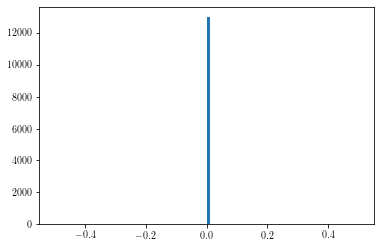

In [33]:
plt.hist(ak.flatten(g[g_container,'r']),bins=100)
plt.show()